<a href="https://colab.research.google.com/github/opsifiz/AIB5_Mental-Health-Sentiment-Analysis/blob/main/archive/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!pip install contractions
!pip install kagglehub
!pip install -U datasets

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tqdm
import kagglehub
import re
import html
import contractions
import matplotlib.pyplot as plt
import datasets
import json
import os

# Download Data sets

In [6]:
#Download manually
df1 = pd.read_csv('data/Sentiment_Analysis_for_Mental_Health.csv', index_col=0)

In [8]:
df1 = df1.rename(columns={'statement': 'text'})

In [9]:
df1['status'] = df1['status'].replace('Depression', 'depression')
df1['status'] = df1['status'].replace('Bipolar', 'bipolar')

In [ ]:
df2_data = datasets.load_dataset("Kanakmi/mental-disorders")
df2 = pd.DataFrame(df2_data['train'])

In [10]:
df2

,text,label
0,My father - all of my life - has shifted betwe...,0
1,I have health anxiety where I go to the doctor...,3
2,I was thinking about the differences between B...,0
3,Let me preface this by saying that I promise I...,2
4,"I've been exploring this forum for awhile, and...",0
...,...,...
465046,Around halloween i started getting distant fro...,0
465047,I coundn't sleep since I accidentally spilled ...,3
465048,IDK if this is a bpd symptom but I really have...,0
465049,I have prolonged this enough. I am losing my p...,0


In [11]:
df2.columns

Index(['text', 'label'], dtype='object')

In [14]:
df2 = df2.rename(columns={'label': 'status'})

In [15]:
label_mapping = {
    0: 'BPD',
    1: 'bipolar',
    2: 'depression',
    3: 'Anxiety',
    4: 'schizophrenia',
    5: 'mentalillness'
}

df2['status'] = df2['status'].map(label_mapping)

df2['status'].value_counts()

,count
status,
BPD,170272
Anxiety,129350
depression,96982
mentalillness,30521
bipolar,28551
schizophrenia,9375


In [16]:
path = kagglehub.dataset_download("kamaruladha/mental-disorders-identification-reddit-nlp")
path = os.path.join(path, 'mental_disorders_reddit.csv')

df3 = pd.read_csv(path)
df3

100%|██████████| 208M/208M [00:01<00:00, 137MB/s]

Extracting files...


,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD
...,...,...,...,...,...
701782,Where can you go to get help for someone menta...,Someone (a war veteran) I know is mentally ill...,1396298261,False,mentalillness
701783,I am rooster illusion,AMA,1344639905,False,mentalillness
701784,I look again to make sure so one is near me an...,NaN,1353891546,False,mentalillness
701785,"NAMI | Peer-to-Peer is a unique, experiential ...",NaN,1348724331,False,mentalillness


In [ ]:
df3.columns

Index(['title', 'selftext', 'created_utc', 'over_18', 'subreddit'], dtype='object')

In [17]:
df3 = df3.drop(columns=['created_utc','over_18'])
df3 = df3.rename(columns={'subreddit': 'status'})
df3


,title,selftext,status
0,Life is so pointless without others,Does anyone else think the most important part...,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",BPD
4,help,[removed],BPD
...,...,...,...
701782,Where can you go to get help for someone menta...,Someone (a war veteran) I know is mentally ill...,mentalillness
701783,I am rooster illusion,AMA,mentalillness
701784,I look again to make sure so one is near me an...,NaN,mentalillness
701785,"NAMI | Peer-to-Peer is a unique, experiential ...",NaN,mentalillness


In [ ]:
df3.head(10)

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD
5,My ex got diagnosed with BPD,"Without going into detail, this diagnosis expl...",1650350635,False,BPD
6,Is misdiagnosis of BPD common? I am asking bec...,(Reposting here on the larger sub on recommend...,1650349446,False,BPD
7,I have trouble identifying my sexual orientati...,I grew up mostly dating men but realized when ...,1650349125,False,BPD
8,Needing advice…,I posted on this sub earlier today about havin...,1650349094,False,BPD
9,Do I have BPD?,[removed],1650349072,True,BPD


In [35]:
df3 = df3[~df3['title'].str.contains('\[deleted\]', na=False)]
df3 = df3[~df3['selftext'].str.contains('\[deleted\]', na=False)]
df3 = df3[~df3['selftext'].str.contains('\[removed\]', na=False)]
df3['text'] = df3['title'].fillna('') + ' ' + df3['selftext'].fillna('')

df3 = df3[df3['text'] != '']
df3 = df3.drop(columns=['title','selftext'])
df3

,status,text
0,BPD,Life is so pointless without others Does anyon...
1,BPD,Cold rage? Hello fellow friends 😄\n\nI'm on th...
2,BPD,I don’t know who I am My [F20] bf [M20] told m...
3,BPD,"HELP! Opinions! Advice! Okay, I’m about to ope..."
5,BPD,My ex got diagnosed with BPD Without going int...
...,...,...
701782,mentalillness,Where can you go to get help for someone menta...
701783,mentalillness,I am rooster illusion AMA
701784,mentalillness,I look again to make sure so one is near me an...
701785,mentalillness,"NAMI | Peer-to-Peer is a unique, experiential ..."


In [36]:
status_1 = df1['status'].value_counts().index.values
status_1

array(['Normal', 'depression', 'Suicidal', 'Anxiety', 'bipolar', 'Stress',
       'Personality disorder'], dtype=object)

In [37]:
status_2 = df2['status'].value_counts().index.values
status_2

array(['BPD', 'Anxiety', 'depression', 'mentalillness', 'bipolar',
       'schizophrenia'], dtype=object)

In [38]:
status_3 = df3['status'].value_counts().index.values
status_3

array(['BPD', 'Anxiety', 'depression', 'mentalillness', 'bipolar',
       'schizophrenia'], dtype=object)

In [39]:
status_all = list(set(list(status_1) + list(status_2) + list(status_3)))
status_all

['Suicidal',
 'mentalillness',
 'Anxiety',
 'bipolar',
 'schizophrenia',
 'Personality disorder',
 'depression',
 'Stress',
 'Normal',
 'BPD']

In [71]:
df1['from'] = 'df1'
df2['from'] = 'df2'
df3['from'] = 'df3'

df = pd.concat([df1, df2, df3], ignore_index=True)
df

,text,status,from
0,oh my gosh,Anxiety,df1
1,"trouble sleeping, confused mind, restless hear...",Anxiety,df1
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,df1
3,I've shifted my focus to something else but I'...,Anxiety,df1
4,"I'm restless and restless, it's been a month n...",Anxiety,df1
...,...,...,...
1123137,Where can you go to get help for someone menta...,mentalillness,df3
1123138,I am rooster illusion AMA,mentalillness,df3
1123139,I look again to make sure so one is near me an...,mentalillness,df3
1123140,"NAMI | Peer-to-Peer is a unique, experiential ...",mentalillness,df3


# Cleaning Data

In [ ]:
df.dropna(inplace=True)

In [77]:
df.isnull().sum()

,0
text,0
status,0
from,0


In [79]:
df.describe()

,text,status,from
count,1114877,1114877,1114877
unique,1102763,10,3
top,I’m so alone just existing for the sake of it ...,BPD,df3
freq,100,377258,605048


In [72]:
df = df[~df['text'].isin(['[deleted]', '[Title]', 'Title'])]

In [81]:
#Clean Special Character
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = contractions.fix(text)
    text = html.unescape(text)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

**Drop Duplicated rows**

In [88]:
df = df[df['text'] != '#NAME?']

In [85]:
df = df[df['clean_text'] != '']

In [108]:
df = df[df['clean_text'] != 'deleted']

In [110]:
df = df[df['clean_text'] != 'removed']

In [96]:
temp = df.groupby('clean_text').agg(
    frequency=('text', 'count'),
    status=('status', lambda x: list(set(x)))
).reset_index()
temp = temp[temp['frequency'] > 1]
temp = temp[temp['status'].apply(lambda x: len(x) > 1)]
temp

,clean_text,frequency,status
0,a,6,"[schizophrenia, depression, bipolar, BPD]"
127,a bipolar a schizophrenic and a podcast is bac...,2,"[schizophrenia, bipolar]"
1091,a daily dose of positivity with regards to men...,2,"[mentalillness, bipolar]"
2379,a friend unadded me today on snap they said th...,2,"[Anxiety, depression]"
2607,a good read,2,"[bipolar, BPD]"
...,...,...,...
1097474,zoloft can zoloft because you to feel disorien...,2,"[Anxiety, depression]"
1097517,zoloft has anyone experienced peeling dry lips...,2,"[mentalillness, depression]"
1097526,zoloft hello i have been on zoloft mg for abou...,2,"[Anxiety, depression]"
1097567,zoloft is killing me hello i am years old i ha...,2,"[Anxiety, depression]"


In [97]:
df = df[~df['clean_text'].isin(temp['clean_text'])]

In [113]:
df = df.drop_duplicates(subset='clean_text', keep='first')

In [114]:
df['text'] = df['clean_text']
df.drop(columns=['clean_text'], inplace=True)
df

,text,status,from
0,oh my gosh,Anxiety,df1
1,trouble sleeping confused mind restless heart ...,Anxiety,df1
2,all wrong back off dear forward doubt stay in ...,Anxiety,df1
3,i have shifted my focus to something else but ...,Anxiety,df1
4,i am restless and restless it is been a month ...,Anxiety,df1
...,...,...,...
1123137,where can you go to get help for someone menta...,mentalillness,df3
1123138,i am rooster illusion ama,mentalillness,df3
1123139,i look again to make sure so one is near me an...,mentalillness,df3
1123140,nami peertopeer is a unique experiential learn...,mentalillness,df3


In [116]:
df.describe()

,text,status,from
count,1094740,1094740,1094740
unique,1094740,10,3
top,crazy motherfucker so i have a lot of random i...,BPD,df3
freq,1,373995,595322


**Filter no-meaning sentences**

In [117]:
import nltk
from nltk.corpus import words

nltk.download('words')

english_vocab = set(words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [118]:
def filter_nonsense(text):
    word_list = text.split()
    if(len(word_list) == 1):
      return True
    return all(word not in english_vocab or len(word)==1 for word in word_list)

In [120]:
#see Which row has no meaning
temp = df[df['text'].apply(filter_nonsense)]

for row in temp.iterrows():
  print(row[1]['text'])

anxious
chintay matha betha kortece
fucking years
annoyed
punyetaaaaaa
dios skskkwkwow jk t amo
cement
sebastiann
ki obostha mama
hair
yooo yooo yooo
siiiiu
parci
alhamdulillah
rikiyat hhhhhhhhhhh
josss
stomach
inshaallah
hikhok
embarrassing
penis
hellooooo
sraaahhhhh ms
wooo hoooo
amigooos
heh
bae
foo
constructive
boey
bumbleby sakakallen au
okni kuma burger
rengoku
cybersecurity
punyetaaaaaaa
danganronpa
callalos antuna
pakyoo
burak ozdemirrr
ngl snakes
leoooo
naoh culiaoooo
jungkook yeager trending yuuh
i burnumun diki
goku
boast
maradona
yeuaipiiiiii
telepathy
memories panga
powercauplebrasil
tintin
deseo pene
delicious
aaaah sarah spacemundinho
debt
hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh wanari hhhhhhhhhhhhhhhhhhhhhhhhhhh
jyo tiesoo
select
tomorrow
sleepy
jyp murio
awiwit
hbd amo
barata
cineslai
allahumma yassirwalaa tuassir
itaru chigasaki dni
sasukeeeeeeeeeeeeh
yaass ganaron jaguares extincinsurvivor
bociya
como que jyp ripeo
watdafak
yakari yakari
perdon
boaaaan
okok
que 

In [121]:
def filter(text):
    word_list = text.split()
    if(len(word_list) == 1):
      return False
    return not all(word not in english_vocab or len(word)==1 for word in word_list)

In [122]:
new_df = df[df['text'].apply(filter)]
new_df = new_df.reset_index(drop=True)
new_df

,text,status,from
0,oh my gosh,Anxiety,df1
1,trouble sleeping confused mind restless heart ...,Anxiety,df1
2,all wrong back off dear forward doubt stay in ...,Anxiety,df1
3,i have shifted my focus to something else but ...,Anxiety,df1
4,i am restless and restless it is been a month ...,Anxiety,df1
...,...,...,...
1093453,where can you go to get help for someone menta...,mentalillness,df3
1093454,i am rooster illusion ama,mentalillness,df3
1093455,i look again to make sure so one is near me an...,mentalillness,df3
1093456,nami peertopeer is a unique experiential learn...,mentalillness,df3


In [130]:
new_df.to_csv('drive/MyDrive/cleaned_dataset.csv', index=False)

# Visualize

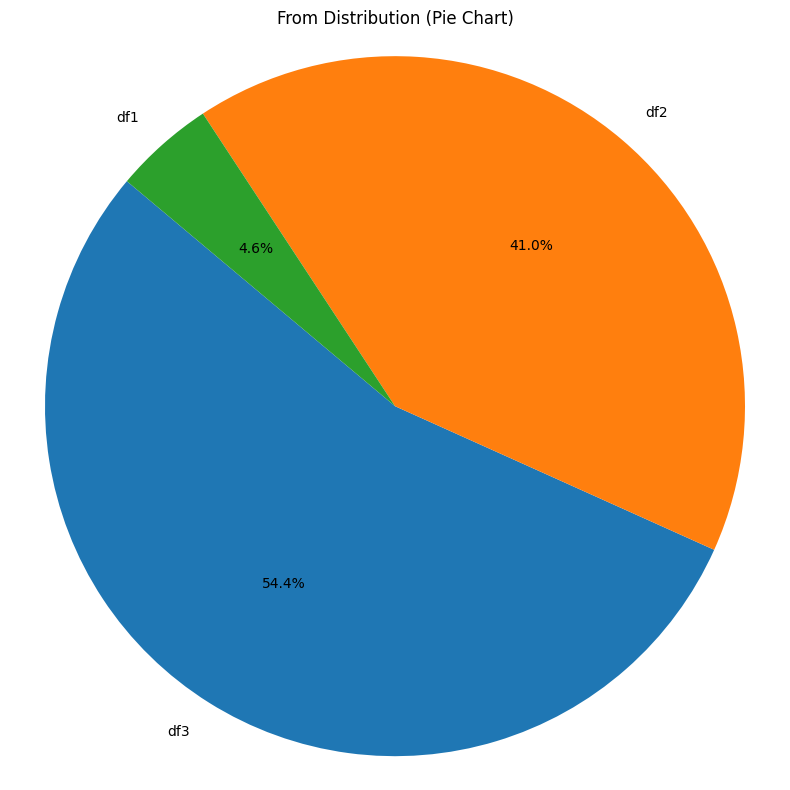

In [124]:
status_counts = df['from'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)

plt.title("From Distribution (Pie Chart)")
plt.axis('equal')
plt.tight_layout()
plt.show()

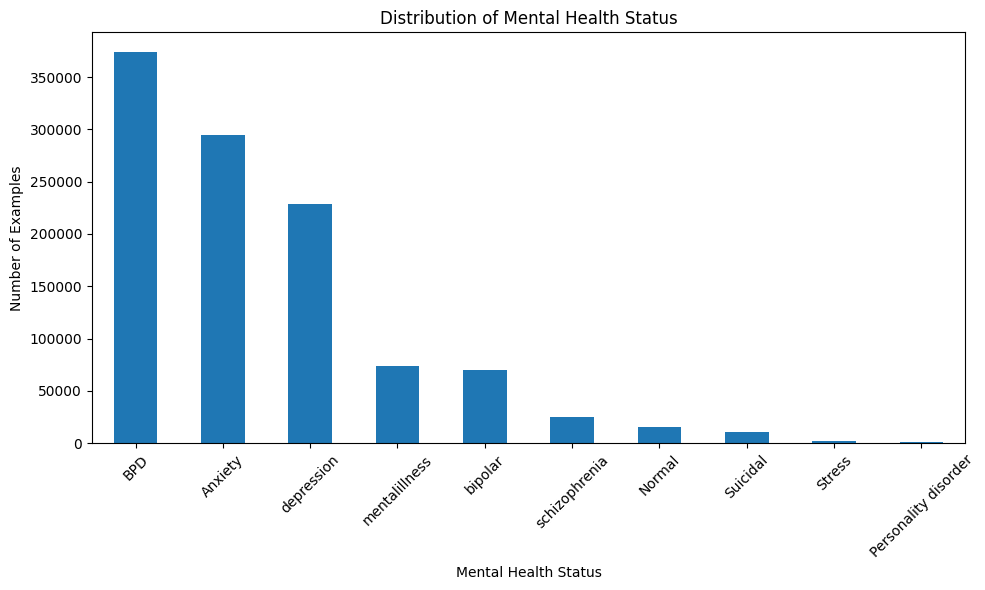

In [125]:
status_counts = df['status'].value_counts()
plt.figure(figsize=(10, 6))

status_counts.plot(kind='bar')

plt.title("Distribution of Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Number of Examples")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [126]:
df1 = df[df['from']=='df1']
df2 = df[df['from']=='df2']
df3 = df[df['from']=='df3']

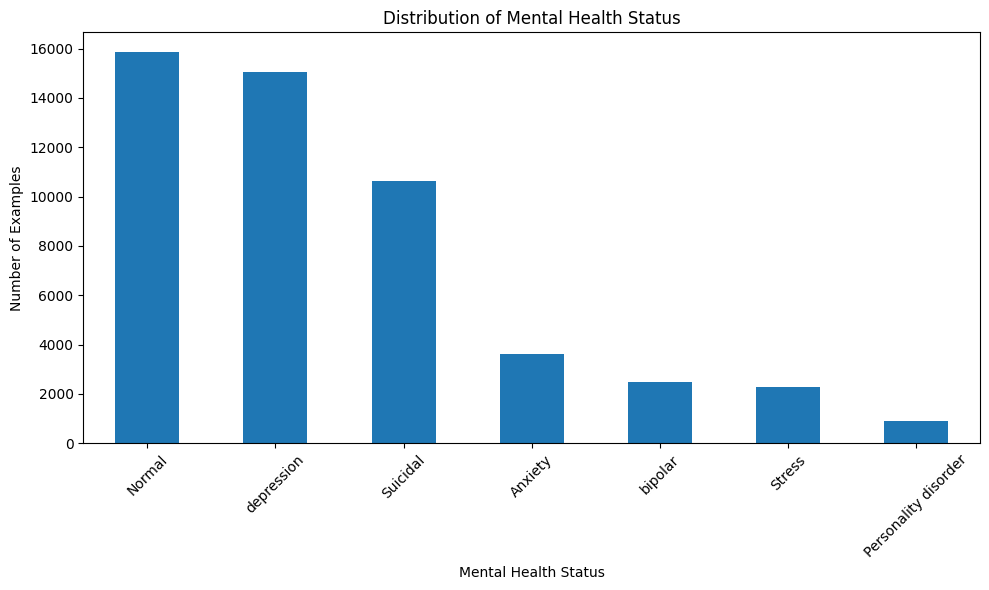

In [127]:
status_counts = df1['status'].value_counts()
plt.figure(figsize=(10, 6))

status_counts.plot(kind='bar')

plt.title("Distribution of Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Number of Examples")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

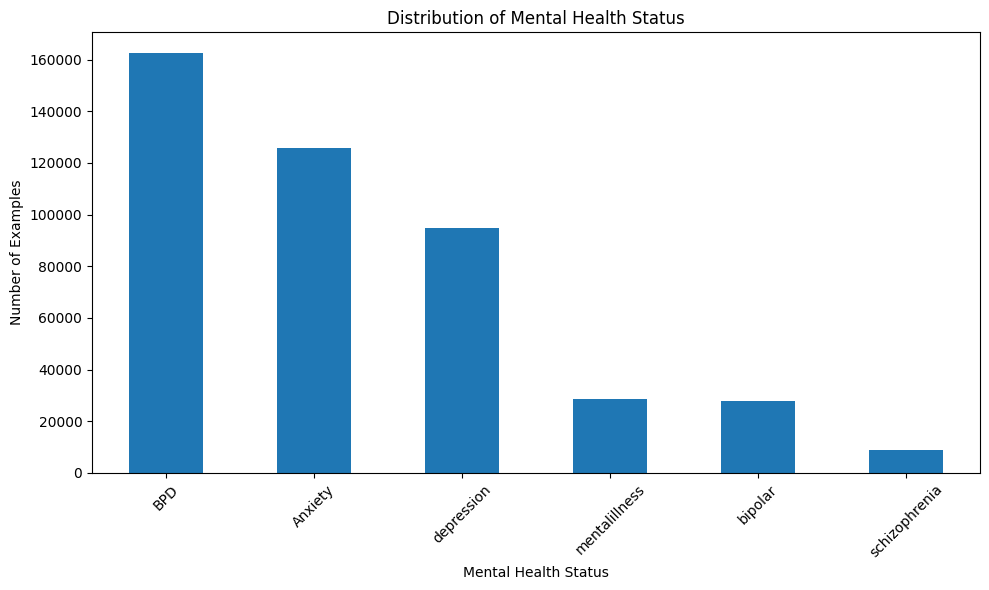

In [128]:
status_counts = df2['status'].value_counts()
plt.figure(figsize=(10, 6))

status_counts.plot(kind='bar')

plt.title("Distribution of Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Number of Examples")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

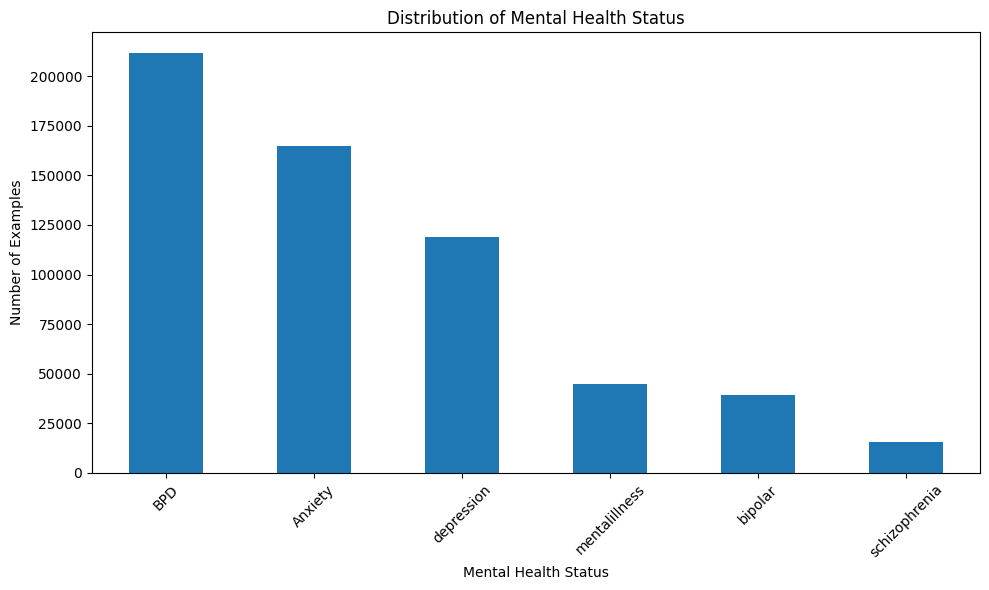

In [129]:
status_counts = df3['status'].value_counts()
plt.figure(figsize=(10, 6))

status_counts.plot(kind='bar')

plt.title("Distribution of Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Number of Examples")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()